In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xuebo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xuebo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [34]:
true_df = pd.read_csv("True.csv")
false_df = pd.read_csv("Fake.csv")

In [35]:
pd.options.display.max_colwidth = 1000

In [36]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support edu...",politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits on Monday: Pentagon,"WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on conditi...",politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',"WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.” The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loomed over the White House since Trump took office in January....",politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,"WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed the information that came from Papadopoulos to their American counterparts wh

In [37]:
false_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t...",News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but team...",News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me, the former sheriff tweeted. I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA I am UNINTIMIDATED by lib media attempts to smear and discr...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH Philip Bump (@pbump) December 29, 2017 That makes

In [71]:
true_df['target'] = 1
false_df['target'] = 0
news_df = pd.concat([true_df,false_df]).reset_index(drop=True)

In [72]:
news_df['target'].value_counts()

0    23481
1    21417
Name: target, dtype: int64

In [73]:
def clean(text):
    text = re.sub("http://\S+"," ", text)
    text = re.sub("\@", " ",text.lower())
    text = re.sub(r'[^\w\s]', '', text).split()
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text =  [wnl.lemmatize(word) for word in text if word not in stopwords] 
    text = ' '.join(text)
    text = ''.join([i for i in text if not i.isdigit()])
    return text

In [75]:
## Cleaning text Data
news_df['text'] = news_df['text'].apply(clean)

## Model 1 lightGBM

In [76]:
# define train and test datasets split datasets
# use pipeline
# us LightGBM as classification model
from sklearn.model_selection import train_test_split
import lightgbm as lgb


x_train,x_test,y_train,y_test = train_test_split(news_df['text'], news_df.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', lgb.LGBMClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.78%


In [47]:
## f1 score and confusion matrix calculation
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[4669   13]
 [   7 4291]]
              precision    recall  f1-score   support

       false       1.00      1.00      1.00      4682
        true       1.00      1.00      1.00      4298

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



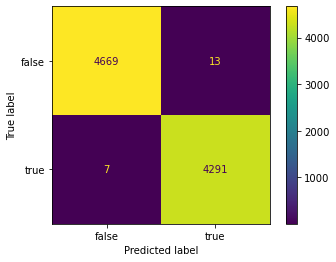

In [48]:
## confusion matrix of model
plot_confusion_matrix(model,x_test,y_test)

## Model 2 Logistic Regression

In [49]:
## predict using logistic regression classifier
from sklearn.linear_model import LogisticRegression


x_train,x_test,y_train,y_test = train_test_split(news_df['text'], news_df.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',  LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.82%


In [50]:
## confusion matrix of logtistic regression
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[4625   57]
 [  49 4249]]
              precision    recall  f1-score   support

       false       0.99      0.99      0.99      4682
        true       0.99      0.99      0.99      4298

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



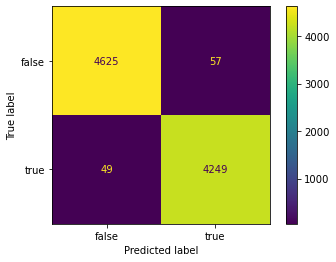

In [51]:
## confusion matrix of model
plot_confusion_matrix(model,x_test,y_test)

## Model 3 Deeplearning CNN model

In [77]:

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [84]:
##text to verctor conversion
cv=CountVectorizer(max_features = 500,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('new_cv_train:',cv_train_reviews.shape)
print('new_cv_test:',cv_test_reviews.shape)

new_cv_train: (35918, 500)
new_cv_test: (8980, 500)


In [89]:
## transform to numpy array
new_cv_train_np=cv_train_reviews.toarray()

In [94]:
new_cv_train_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 2, 3, ..., 0, 0, 1],
       [0, 1, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [85]:
cv_train_reviews

<35918x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2170556 stored elements in Compressed Sparse Row format>

In [90]:
## define the model
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = new_cv_train_np.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [91]:
## compile the model
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [95]:
y_train

32861    0
6465     1
1732     1
10056    1
2121     1
        ..
1661     1
18523    1
44739    0
40259    0
41824    0
Name: target, Length: 35918, dtype: int64

In [96]:
## model fitting
model.fit(new_cv_train_np,y_train , epochs = 5)

Epoch 1/5
1123/1123 [==============================] - 1s 1ms/step - loss: 0.0771 - accuracy: 0.9785
Epoch 2/5
1123/1123 [==============================] - 1s 1ms/step - loss: 0.0215 - accuracy: 0.9941
Epoch 3/5
1123/1123 [==============================] - 1s 1ms/step - loss: 0.0120 - accuracy: 0.9966
Epoch 4/5
1123/1123 [==============================] - 1s 1ms/step - loss: 0.0116 - accuracy: 0.9970
Epoch 5/5
1123/1123 [==============================] - 1s 1ms/step - loss: 0.0080 - accuracy: 0.9977


In [97]:
## prediction 
pred = model.predict(cv_test_reviews)

In [98]:
for i in range(len(pred)):
    if(pred[i] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0

In [99]:
accuracy_score(pred,y_test)

0.9951002227171493

In [100]:
## confusion matrix

cv_report = classification_report(y_test,pred,target_names = ['0','1'])
print(cv_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4682
           1       0.99      1.00      0.99      4298

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [101]:
cm_cv = confusion_matrix(y_test,pred)
cm_cv

array([[4658,   24],
       [  20, 4278]], dtype=int64)

In [102]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

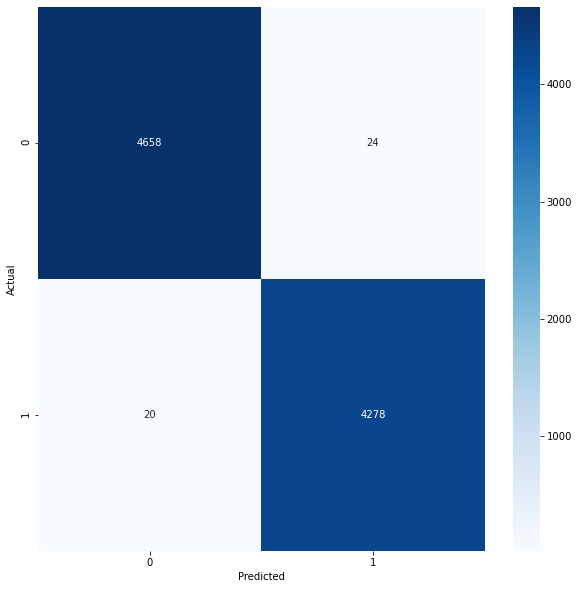

In [104]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')

### Reason to choose LightGMB

1.Faster training speed and higher efficiency
2.lower memory usage
3.better accuracy than any other boosting algorithms
4.compatibility with large datasets.

### Reason to choose Logistic Regression

1.Logistic regression is easier to implement, interpret, and very efficient to train.
2.It makes no assumptions about distributions of classes in feature space.
3.Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.
4.Logistic regression is less inclined to over-fitting

### Reason to choose CNN

1.CNN learns the features automatically without mentioning it explicitly. These filters help in extracting the right and relevant features from the input data